In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as sdist
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
%matplotlib inline

In [6]:
# def spectral(X, gt, n_points, set_sigma, norm_spec, plotter, printer):
#     print('hello from spectral')
    
def spectral_clustering(problem, ground_truth, set_sigma=0.25, norm_spec=True, plotter=False, printer=False):
    """perform spectral clustering
    keyword arguments:
        problem: to cluster
        ground_truth: of the problem
        sigma: affinity scaling factor
        plotter: plot the problem default=False
        printer: print out statments for debugging default=False
    returns:
        normalized mutual information score
    """
    
    # load the problem
    X = np.loadtxt(problem)
    if printer: print('problem:\n', X)
        
    # load the ground truth    
    gt = np.loadtxt(ground_truth).astype(np.int32)
    if printer: print('len ground truth:\n', len(gt))
        
    # calculate the nuber of clusters from the ground truth
    nclusters = len(np.unique(gt))
    if printer: print('number of clusters:\n', nclusters)
    
    if plotter:
        if X.shape[1] == 2:
            plt.scatter(X[:,0], X[:,1])
            plt.ylabel('y')
            plt.xlabel('x')
            plt.show()

    # number of points in each subspace
    points, n_points = np.unique(gt, return_counts=True)
    if printer: print('points, n_points:\n', points, n_points)   
    
    ## Set affinity scaling factor
    sigma = set_sigma
    if printer: print('sigma =', sigma)

    # calculate pairwise distance (euclidean)
    X_dist = sdist.squareform(sdist.pdist(X))
    if printer: print('distance:\n', X_dist)
        
    # calculate the affinities
    spec_aff = np.exp((-1.0*np.power(X_dist,2))/(2.0 * np.power(sigma,2)))
    if printer: print('spec_aff =\n', spec_aff)
        
    # plot affinity matrix
    if plotter:
        # plt.imshow(X_affinity, origin='lower')
        plt.imshow(spec_aff)
        plt.show()
        
    # remove the ones on the diag
    spec_aff[range(n_points[0]+n_points[1]),range(n_points[0]+n_points[1])] = 0.0
    if printer: print('spec_aff =\n', spec_aff)
        
    # plot
    if plotter:
        # plt.imshow(X_affinity, origin='lower')
        plt.imshow(spec_aff)
        plt.show()
        
    # get the row sums
    spec_aff_diag = np.diagflat(1.0/np.sqrt(np.apply_along_axis(np.sum,0,spec_aff)))
    if printer: print('spec_aff_diag =\n', spec_aff_diag)

    # plot
    if plotter:
        plt.imshow(spec_aff_diag)
        # plt.imshow(spec_aff_diag, origin='lower')
        plt.show()

    # normilization
    spec_norm = np.matmul(np.matmul(spec_aff_diag, spec_aff), spec_aff_diag)
    if printer: print('spec_norm =\n', spec_norm)

    # plot
    if plotter:
        #plt.imshow(X_norm, origin='lower')
        plt.imshow(spec_norm)
        plt.show()   
    
#     # calculate eignvalueas and eignvectors
#     e_vals, e_vecs = np.linalg.eigh(X_norm)
#     if printer: print('e-vals =', e_vals)
#     if printer: print('e-vecs =', e_vecs)
        
#     if plotter:
#         plt.plot(np.linspace(1,len(e_vals), num=len(e_vals)), e_vals)
#         plt.show()

    if norm_spec:
        aff_spec = spec_norm
    else:
        aff_spec = spec_aff
    if printer: print('aff_spec =', aff_spec)
        
    if plotter:
        if X.shape[1] == 2:
            for i in range(X.shape[0]):
                for j in range(X.shape[0]):
                    if i==j: continue
#                     print(i,j)
#                     print(aff_sub[i,j])
                    if gt[i] == 0:
                        plt.plot(X[[i,j],0],X[[i,j],1], color='red', alpha=aff_spec[i,j])
                    else:
                        plt.plot(X[[i,j],0],X[[i,j],1], color='blue', alpha=aff_spec[i,j])
            plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in gt])
#             plt.title('Ground Truth: ' + problem )
            plt.title('Spectral Connections' )
            plt.ylabel('y')
            plt.xlabel('x')
            plt.show()
            
    

problem:
 [[1. 1.]
 [1. 2.]
 [9. 8.]
 [9. 9.]]
len ground truth:
 4
number of clusters:
 2


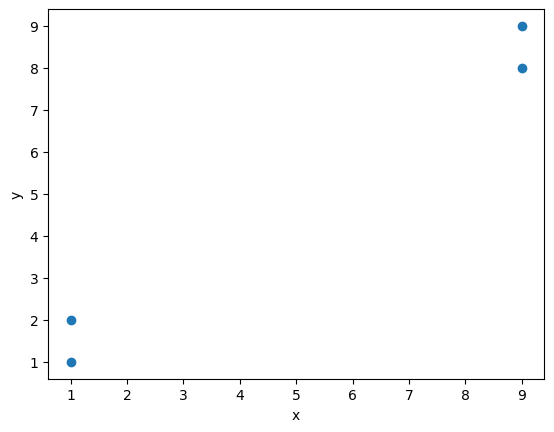

points, n_points:
 [0 1] [2 2]
sigma = 0.25
distance:
 [[ 0.          1.         10.63014581 11.3137085 ]
 [ 1.          0.         10.         10.63014581]
 [10.63014581 10.          0.          1.        ]
 [11.3137085  10.63014581  1.          0.        ]]
spec_aff =
 [[1.00000000e+00 3.35462628e-04 0.00000000e+00 0.00000000e+00]
 [3.35462628e-04 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.35462628e-04]
 [0.00000000e+00 0.00000000e+00 3.35462628e-04 1.00000000e+00]]


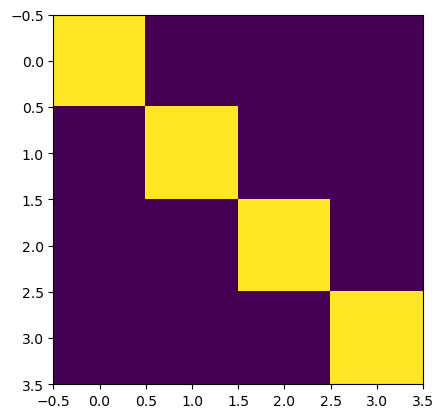

spec_aff =
 [[0.         0.00033546 0.         0.        ]
 [0.00033546 0.         0.         0.        ]
 [0.         0.         0.         0.00033546]
 [0.         0.         0.00033546 0.        ]]


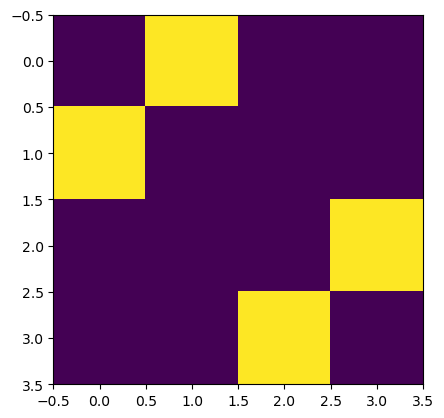

spec_aff_diag =
 [[54.59815003  0.          0.          0.        ]
 [ 0.         54.59815003  0.          0.        ]
 [ 0.          0.         54.59815003  0.        ]
 [ 0.          0.          0.         54.59815003]]


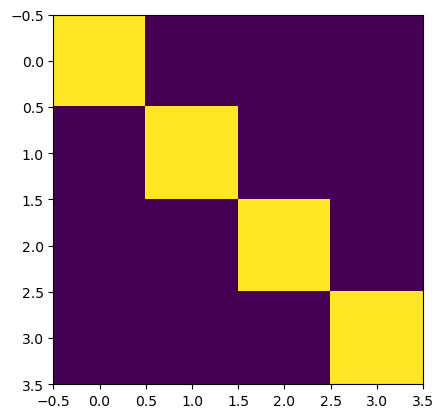

spec_norm =
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


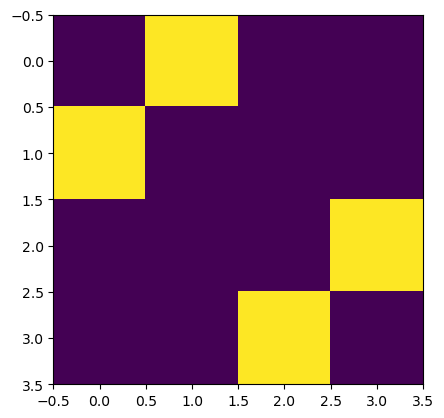

aff_spec = [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


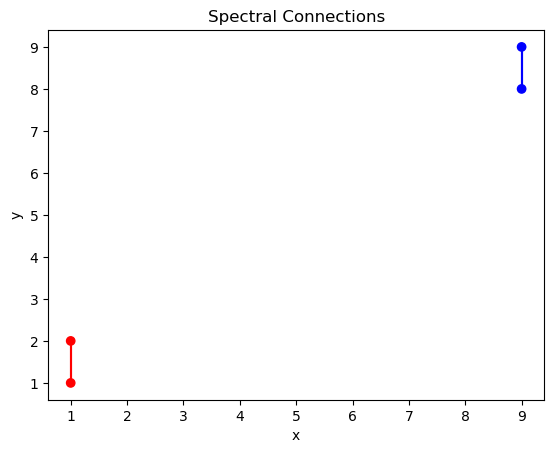

In [9]:
spectral_clustering('../toy_problems/01_simple_two_and_two.tp', '../toy_problems/01_simple_two_and_two_ground_truth.tp', set_sigma=0.25, norm_spec=True, plotter=True, printer=True)